# Google Playstore Case Study

In this module you’ll be learning data visualisation with the help of a case study. This will enable you to understand how visualisation aids you in solving business problems. 

**Problem Statement**

The team at Google Play Store wants to develop a feature that would enable them to boost visibility for the most promising apps. Now, this analysis would require a preliminary understanding of the features that define a well-performing app. You can ask questions like:
- Does a higher size or price necessarily mean that an app would perform better than the other apps? 
- Or does a higher number of installs give a clear picture of which app would have a better rating than others?




### Session 1 - Introduction to Data Visualisation

In [1]:
#import the libraries
import numpy as np
import pandas as pd


In [2]:
#read the dataset and check the first five rows
inp0 = pd.read_csv("googleplaystore_v2.csv")
inp0.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
inp0.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.000000,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.000000,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9500.000000,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.529524,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19000.000000,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [4]:
#Check the shape of the dataframe
inp0.shape

(10841, 13)

In [5]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


In [6]:
inp0.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

### Data Handling and Cleaning

The first few steps involve making sure that there are no __missing values__ or __incorrect data types__ before we proceed to the analysis stage. These aforementioned problems are handled as follows:

 - For Missing Values: Some common techniques to treat this issue are
    - Dropping the rows containing the missing values
    - Imputing the missing values
    - Keep the missing values if they don't affect the analysis
 
    
 - Incorrect Data Types:
    - Clean certain values 
    - Clean and convert an entire column
 

handing rating of app
 - target value is Rating of app
 - Removing the missing value

In [7]:
#Check the datatypes of all the columns of the dataframe

inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


#### Missing Value Treatment

In [8]:
#Check the number of null values in the columns
inp0.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Handling missing values for rating
 - Ratings is the target variable
 - drop the records

In [9]:
#Drop the rows having null values in the Rating field
inp0 = inp0[~inp0.Rating.isnull()]
inp0.shape

#Check the shape of the dataframe


(9367, 13)

In [10]:
# Check the number of nulls in the Rating field again to cross-verify
inp0.Rating.isnull().sum()


0

In [11]:
#Question
#Check the number of nulls in the dataframe again and find the total number of null values
inp0.isnull().sum()


App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

In [12]:
#Inspect the nulls in the Android Version column
inp0[inp0['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [13]:
inp0.loc[10472,:]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              1.9
Rating                                                 19
Reviews                                              3.0M
Size                                              21516.5
Installs                                             Free
Type                                                    0
Price                                            Everyone
Content Rating                                        NaN
Genres                                  February 11, 2018
Last Updated                                       1.0.19
Current Ver                                    4.0 and up
Android Ver                                           NaN
Name: 10472, dtype: object

In [14]:
#Drop the row having shifted values
inp0[((inp0['Android Ver'].isnull()) & (inp0.Category == "1.9"))]


#Check the nulls againin Android version column to cross-verify

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


Imputing Missing Values

- For numerical variables use mean and median
- For categorical variables use mode

In [15]:
#Check the most common value in the Android version column
inp1 = inp0[~((inp0['Android Ver'].isnull()) & (inp0.Category == "1.9"))]
inp1


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.000000,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.000000,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.000000,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.000000,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.000000,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2600.000000,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.000000,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.000000,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.529524,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [16]:
#Fill up the nulls in the Android Version column with the above value
inp1[inp1['Android Ver'].isnull()]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


In [17]:
#Check the nulls in the Android version column again to cross-verify
inp1['Android Ver'].value_counts()

4.1 and up            2059
Varies with device    1319
4.0.3 and up          1240
4.0 and up            1131
4.4 and up             875
2.3 and up             582
5.0 and up             535
4.2 and up             338
2.3.3 and up           240
3.0 and up             211
2.2 and up             208
4.3 and up             207
2.1 and up             113
1.6 and up              87
6.0 and up              48
7.0 and up              41
3.2 and up              31
2.0 and up              27
5.1 and up              18
1.5 and up              16
3.1 and up               8
2.0.1 and up             7
4.4W and up              6
8.0 and up               5
7.1 and up               3
4.0.3 - 7.1.1            2
1.0 and up               2
5.0 - 8.0                2
4.1 - 7.1.1              1
5.0 - 6.0                1
7.0 - 7.1.1              1
Name: Android Ver, dtype: int64

In [18]:
#Check the nulls in the entire dataframe again
inp1['Android Ver'].mode()[0]


'4.1 and up'

In [19]:
#Check the most common value in the Current version column
inp1['Android Ver'].fillna(inp1['Android Ver'].mode()[0])


0              4.0.3 and up
1              4.0.3 and up
2              4.0.3 and up
3                4.2 and up
4                4.4 and up
                ...        
10834            4.1 and up
10836            4.1 and up
10837            4.1 and up
10839    Varies with device
10840    Varies with device
Name: Android Ver, Length: 9366, dtype: object

In [20]:
#Replace the nulls in the Current version column with the above value
inp1['Android Ver'].value_counts()

4.1 and up            2059
Varies with device    1319
4.0.3 and up          1240
4.0 and up            1131
4.4 and up             875
2.3 and up             582
5.0 and up             535
4.2 and up             338
2.3.3 and up           240
3.0 and up             211
2.2 and up             208
4.3 and up             207
2.1 and up             113
1.6 and up              87
6.0 and up              48
7.0 and up              41
3.2 and up              31
2.0 and up              27
5.1 and up              18
1.5 and up              16
3.1 and up               8
2.0.1 and up             7
4.4W and up              6
8.0 and up               5
7.1 and up               3
4.0.3 - 7.1.1            2
1.0 and up               2
5.0 - 8.0                2
4.1 - 7.1.1              1
5.0 - 6.0                1
7.0 - 7.1.1              1
Name: Android Ver, dtype: int64

In [21]:
# Question : Check the most common value in the Current version column again
inp1['Android Ver'].isnull().sum()

2

#### Handling Incorrect Data Types 

In [22]:
#Check the datatypes of all the columns 
inp1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       2
dtype: int64

In [23]:
#Question - Try calculating the average price of all apps having the Android version as "4.1 and up" 
inp1[inp1['Current Ver'].isnull()]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2700.0,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11.0,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8700.0,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
7333,Dots puzzle,FAMILY,4.0,179,14000.0,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up


In [24]:
#Analyse the Price column to check the issue

inp1['Current Ver'].value_counts()

Varies with device    1415
1.0                    458
1.1                    195
1.2                    126
1.3                    120
                      ... 
4.0.30                   1
1.0.141215               1
2.13.2                   1
4.5.5.1-2090AL-REL       1
11.04                    1
Name: Current Ver, Length: 2638, dtype: int64

In [25]:
#Write the function to make the changes
a= inp1['Current Ver'].mode()[0]
a

'Varies with device'

In [26]:
inp1['Current Ver'] = inp1['Current Ver'].fillna(inp1['Current Ver'].mode()[0])
inp1['Current Ver'].isnull().sum()

#After that do a value_counts()
# inp1['Current Ver'].value_counts()

<ipython-input-26-02ad6c37b666>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inp1['Current Ver'] = inp1['Current Ver'].fillna(inp1['Current Ver'].mode()[0])


0

In [27]:
#Analyse the Reviews c
inp1['Current Ver'].value_counts()

Varies with device    1419
1.0                    458
1.1                    195
1.2                    126
1.3                    120
                      ... 
4.0.30                   1
1.0.141215               1
2.13.2                   1
4.5.5.1-2090AL-REL       1
11.04                    1
Name: Current Ver, Length: 2638, dtype: int64

In [28]:
inp1['Current Ver'].mode()[0]

'Varies with device'

In [29]:
#Change the dtype of this column
inp1['Current Ver'] = inp1['Current Ver'].fillna(inp1['Current Ver'].mode()[0])


#Check the quantitative spread of this dataframe



<ipython-input-29-a6ceb009316a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inp1['Current Ver'] = inp1['Current Ver'].fillna(inp1['Current Ver'].mode()[0])


In [30]:
#Analyse the Installs Column
inp1['Current Ver'].isnull().sum()


0

In [31]:
#Question Clean the Installs Column and find the approximate number of apps at the 50th percentile.
inp1.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [32]:
inp1.Price.value_counts()

0          8719
$2.99       114
$0.99       107
$4.99        70
$1.99        59
           ... 
$389.99       1
$3.90         1
$2.00         1
$2.56         1
$3.08         1
Name: Price, Length: 73, dtype: int64

In [33]:
inp1.Price = inp1.Price.apply(lambda x: 0 if x == "0" else float(x[1:]))

C:\Users\hp\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [34]:
inp1.Price.dtype

dtype('float64')

In [35]:
inp1.Price.describe()

count    9366.000000
mean        0.960928
std        15.816585
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

In [36]:
inp1.Price.value_counts()

0.00      8719
2.99       114
0.99       107
4.99        70
1.99        59
          ... 
299.99       1
1.59         1
1.61         1
3.90         1
2.90         1
Name: Price, Length: 73, dtype: int64

In [37]:
inp1.dtypes


App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [38]:
inp1.Reviews = inp1.Reviews.astype("int32")

In [39]:
inp1.Reviews.describe()

count    9.366000e+03
mean     5.140498e+05
std      3.144042e+06
min      1.000000e+00
25%      1.862500e+02
50%      5.930500e+03
75%      8.153275e+04
max      7.815831e+07
Name: Reviews, dtype: float64

In [40]:
inp1.Reviews.dtype

dtype('int32')

In [41]:
inp1.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs           object
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [42]:
inp1.Installs.head()


0        10,000+
1       500,000+
2     5,000,000+
3    50,000,000+
4       100,000+
Name: Installs, dtype: object

In [43]:
def coma(s):
    s = s[:-1]
    i = int(''.join(s.split(',')))
    return i 
'''
def clean_code(val):
    return int(val.replace(',','').replace('+','')) //Best approch

'''
    
inp1.Installs = inp1.Installs.astype('str')
inp1.Installs = inp1.Installs.apply(coma)
inp1.Installs.head()
    


0       10000
1      500000
2     5000000
3    50000000
4      100000
Name: Installs, dtype: int64

In [44]:
inp1.Installs.describe()

count    9.366000e+03
mean     1.789744e+07
std      9.123822e+07
min      1.000000e+00
25%      1.000000e+04
50%      5.000000e+05
75%      5.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

In [45]:
inp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   int32  
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   int64  
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   float64
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9364 non-null   object 
dtypes: float64(3), int32(1), int64(1), object(8)
memory usage: 987.8+ KB


#### Sanity Checks

The data that we have needs to make sense and therefore you can perform certain sanity checks on them to ensure they are factually correct as well. Some sanity checks can be:

- Rating is between 1 and 5 for all the apps.
- Number of Reviews is less than or equal to the number of Installs.
- Free Apps shouldn’t have a price greater than 0.


In [46]:
inp1.Rating.describe()

count    9366.000000
mean        4.191757
std         0.515219
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [47]:
inp1.Rating.value_counts()

4.4    1109
4.3    1076
4.5    1038
4.2     952
4.6     823
4.1     708
4.0     568
4.7     499
3.9     386
3.8     303
5.0     274
3.7     239
4.8     234
3.6     174
3.5     163
3.4     128
3.3     102
4.9      87
3.0      83
3.1      69
3.2      64
2.9      45
2.8      42
2.6      25
2.7      25
2.5      21
2.3      20
2.4      19
1.0      16
2.2      14
1.9      13
2.0      12
1.7       8
2.1       8
1.8       8
1.6       4
1.4       3
1.5       3
1.2       1
Name: Rating, dtype: int64

In [48]:
inp1[inp1.Reviews > inp1.Installs].shape


(7, 13)

In [49]:
#Perform the sanity checks on the Reviews column
inp1 = inp1[inp1.Reviews <= inp1.Installs]

inp1.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [50]:
#perform the sanity checks on prices of free apps 
inp1[(inp1.Type == 'Free')&(inp1.Price > 0)]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [51]:
inp1.Price.describe()

count    9359.000000
mean        0.961116
std        15.822478
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

#### Outliers Analysis Using Boxplot

Now you need to start identifying and removing extreme values or __outliers__ from our dataset. These values can tilt our analysis and often provide us with a biased perspective of the data available. This is where you’ll start utilising visualisation to achieve your tasks. And the best visualisation to use here would be the box plot. Boxplots are one of the best ways of analysing the spread of a numeric variable


Using a box plot you can identify the outliers as follows:

![BoxPlots to Identify Outliers](images\Boxplot.png)

- Outliers in data can arise due to genuine reasons or because of dubious entries. In the latter case, you should go ahead and remove such entries immediately. Use a boxplot to observe, analyse and remove them.
- In the former case, you should determine whether or not removing them would add value to your analysis procedure.

- You can create a box plot directly from pandas dataframe or the matplotlib way as you learnt in the previous session. Check out their official documentation here:
   - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html
   - https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html

In [52]:
#import the plotting libraries
import matplotlib.pyplot as plt
%matplotlib inline


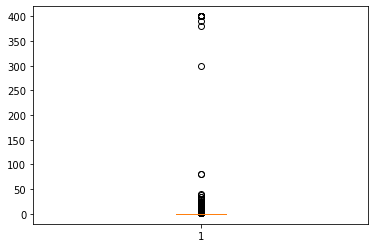

In [53]:
#Create a box plot for the price column
plt.boxplot(inp1.Price)
plt.show()

In [54]:
#Check the apps with price more than 200
inp1[inp1.Price>200]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


In [55]:
#Clean the Price column
inp1 = inp1[inp1.Price < 200]


In [56]:
inp1.Price.describe()

count    9344.000000
mean        0.334463
std         2.169925
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        79.990000
Name: Price, dtype: float64

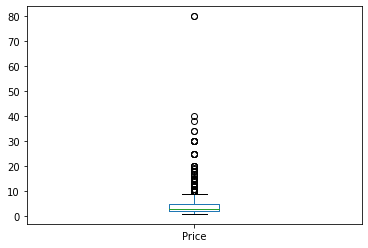

In [57]:
#Create a box plot for paid apps
inp1[inp1.Price>0].Price.plot.box()


In [58]:
#Check the apps with price more than 30
inp1[inp1.Price > 30]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2253,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32000.0,1000,Paid,79.99,Everyone,Medical,"June 18, 2018",19.0,4.0.3 and up
2301,A Manual of Acupuncture,MEDICAL,3.5,214,68000.0,1000,Paid,33.99,Everyone,Medical,"October 2, 2017",2.1.35,4.0 and up
2365,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32000.0,1000,Paid,79.99,Everyone,Medical,"June 18, 2018",19.0,4.0.3 and up
2402,A Manual of Acupuncture,MEDICAL,3.5,214,68000.0,1000,Paid,33.99,Everyone,Medical,"October 2, 2017",2.1.35,4.0 and up
2414,LTC AS Legal,MEDICAL,4.0,6,1300.0,100,Paid,39.99,Everyone,Medical,"April 4, 2018",3.0.1,4.1 and up
5360,I am Rich Person,LIFESTYLE,4.2,134,1800.0,1000,Paid,37.99,Everyone,Lifestyle,"July 18, 2017",1.0,4.0.3 and up


In [59]:
#Clean the Price column again
inp1 = inp1[inp1.Price <= 30]


In [60]:
inp1.shape

(9338, 13)

### Histograms

Histograms can also be used in conjuction with boxplots for data cleaning and data handling purposes. You can use it to check the spread of a numeric variable. Histograms generally work by bucketing the entire range of values that a particular variable takes to specific __bins__. After that, it uses vertical bars to denote the total number of records in a specific bin, which is also known as its __frequency__.


![Histogram](images\Histogram.png)

You can adjust the number of bins to improve its granularity

![Bins change](images\Granular.png)

You'll be using plt.hist() to plot a histogram. Check out its official documentation:https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html

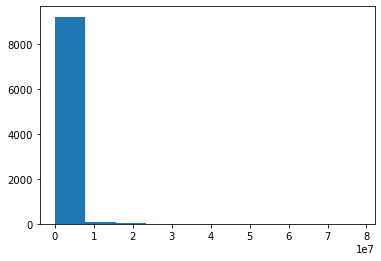

In [61]:
#Create a histogram of the Reviews
plt.hist(inp1.Reviews)
plt.show()


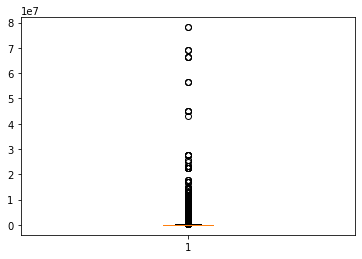

In [62]:
#Create a boxplot of the Reviews column
plt.boxplot(inp1.Reviews)
plt.show()


In [63]:
#Check records with 1 million reviews
inp1[inp1.Reviews >= 1000000]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
139,Wattpad 📖 Free Books,BOOKS_AND_REFERENCE,4.6,2914724,21516.529524,100000000,Free,0.0,Teen,Books & Reference,"August 1, 2018",Varies with device,Varies with device
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,21516.529524,1000000000,Free,0.0,Teen,Books & Reference,"August 3, 2018",Varies with device,Varies with device
189,Uber Driver,BUSINESS,4.4,1254730,21516.529524,10000000,Free,0.0,Everyone,Business,"August 3, 2018",Varies with device,Varies with device
194,OfficeSuite : Free Office + PDF Editor,BUSINESS,4.3,1002861,35000.000000,100000000,Free,0.0,Everyone,Business,"August 2, 2018",9.7.14188,4.1 and up
201,Facebook Pages Manager,BUSINESS,4.0,1279184,21516.529524,50000000,Free,0.0,Everyone,Business,"August 2, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10190,Fallout Shelter,FAMILY,4.6,2721923,25000.000000,10000000,Free,0.0,Teen,Simulation,"June 11, 2018",1.13.12,4.1 and up
10200,Facebook Pages Manager,BUSINESS,4.0,1279800,21516.529524,50000000,Free,0.0,Everyone,Business,"August 6, 2018",Varies with device,Varies with device
10327,Garena Free Fire,GAME,4.5,5534114,53000.000000,100000000,Free,0.0,Teen,Action,"August 3, 2018",1.21.0,4.0.3 and up
10636,FRONTLINE COMMANDO,GAME,4.4,1351833,12000.000000,10000000,Free,0.0,Teen,Action,"October 28, 2013",3.0.3,2.1 and up


In [64]:
#Drop the above records
inp1 = inp1[inp1.Reviews <= 1000000]


In [65]:
inp1.shape

(8634, 13)

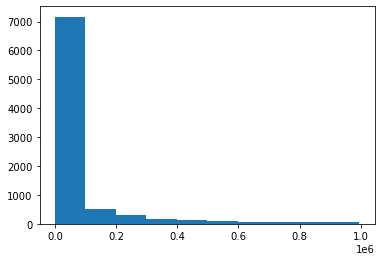

In [66]:
#Question - Create a histogram again and check the peaks
plt.hist(inp1.Reviews)
plt.show()



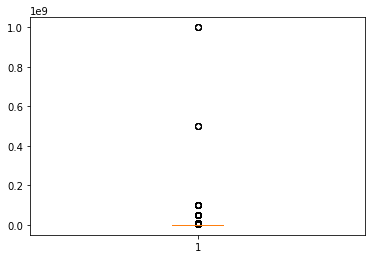

In [67]:
#Question - Create a box plot for the Installs column and report back the IQR
plt.boxplot(inp1.Installs)
plt.show()


In [68]:
#Question - CLean the Installs by removing all the apps having more than or equal to 100 million installs
inp1[inp1.Installs >= 100000000].shape
inp1 = inp1[inp1.Installs < 100000000]


In [69]:
inp1.Installs.shape

(8573,)

{'whiskers': [<matplotlib.lines.Line2D at 0x202829526d0>,
 'caps': [<matplotlib.lines.Line2D at 0x20282938a60>,
 'boxes': [<matplotlib.lines.Line2D at 0x20282952130>],
 'medians': [<matplotlib.lines.Line2D at 0x20282938400>],
 'fliers': [<matplotlib.lines.Line2D at 0x202829384c0>],
 'means': []}

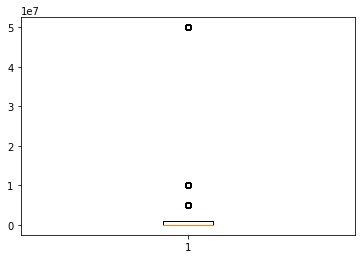

In [70]:
plt.boxplot(inp1.Installs)

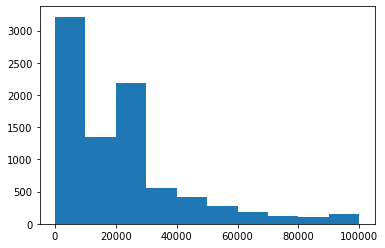

In [71]:
#Plot a histogram for Size as well.
plt.hist(inp1.Size)
plt.show()


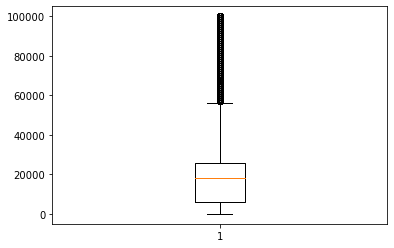

In [72]:
#Question - Create a boxplot for the Size column and report back the median value
plt.boxplot(inp1.Size)
plt.show()

In [73]:
inp1.Installs.shape

(8573,)

In [74]:
inp1.Size.median()

18000.0

### Session 2 - Data Visualisation with Seaborn

Seaborn is Python library to create statistical graphs easily. It is built on top of matplotlib and closely integrated with pandas.

_Functionalities of Seaborn_ :

- Dataset oriented API
- Analysing univariate and bivariate distributions
- Automatic estimation and plotting of  linear regression models
- Convenient views for complex datasets
- Concise control over style
- Colour palettes


In [75]:
#import the necessary libraries
import warnings
warnings.filterwarnings('ignore')


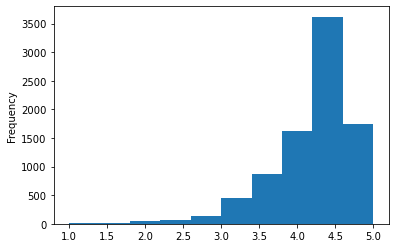

In [76]:
inp1.Rating.plot.hist()

In [77]:
import seaborn as sns

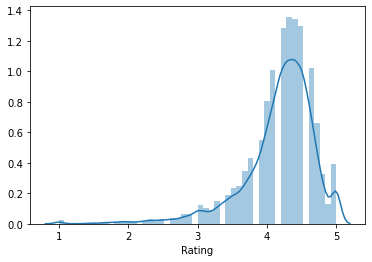

In [78]:
sns.distplot(inp1.Rating)
plt.show()

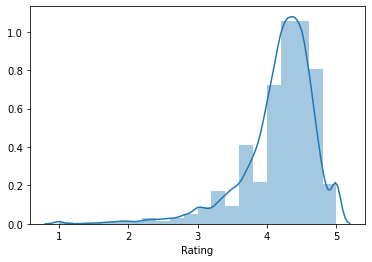

In [79]:
sns.distplot(inp1.Rating, bins =20,vertical =False)
plt.show()

#### Distribution Plots

A distribution plot is pretty similar to the histogram functionality in matplotlib. Instead of a frequency plot, it plots an approximate probability density for that rating bucket. And the curve (or the __KDE__) that gets drawn over the distribution is the approximate probability density curve. 

The following is an example of a distribution plot. Notice that now instead of frequency on the left axis, it has the density for each bin or bucket.

![Distplot](images\Distplot.png)

You'll be using sns.distplot for plotting a distribution plot. Check out its official documentation: https://seaborn.pydata.org/generated/seaborn.distplot.html

In [80]:
#Create a distribution plot for rating


In [81]:
#Change the number of bins



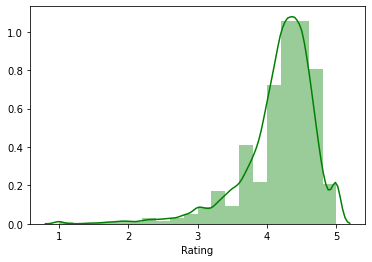

In [82]:
#Change the colour of bins to green
sns.distplot(inp1.Rating, bins =20,vertical =False,color ='g')
plt.show()


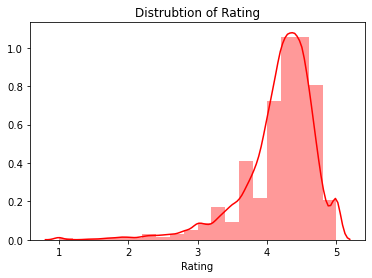

In [83]:
sns.distplot(inp1.Rating, bins =20,vertical =False,color='r')
plt.title('Distrubtion of Rating', fontsize =12)
plt.show()

In [84]:
inp1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.000000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.000000,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.000000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.000000,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2600.000000,500,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.000000,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.000000,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.529524,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


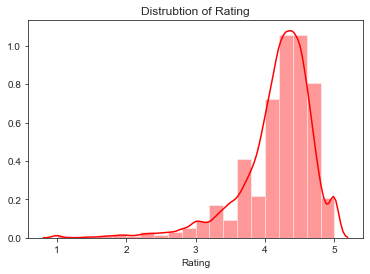

In [85]:
#Apply matplotlib functionalities
sns.set_style("ticks")
sns.distplot(inp1.Rating, bins =20,vertical =False,color='r')
plt.title('Distrubtion of Rating', fontsize =12)
plt.show()



#### Styling Options

One of the biggest advantages of using Seaborn is that you can retain its aesthetic properties and also the Matplotlib functionalities to perform additional customisations. Before we continue with our case study analysis, let’s study some styling options that are available in Seaborn.

-  Check out the official documentation:https://seaborn.pydata.org/generated/seaborn.set_style.html

In [86]:
#Check all the styling options
plt.style.use("ggplot")

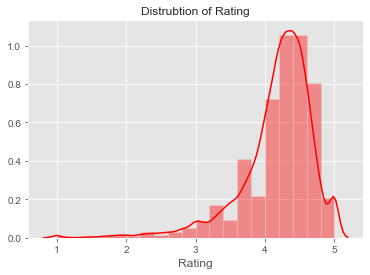

In [87]:
#Change the number of bins to 20
sns.distplot(inp1.Rating, bins =20,vertical =False,color='r')
plt.title('Distrubtion of Rating', fontsize =12)
plt.show()


In [88]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [89]:
plt.style.use('dark_background')

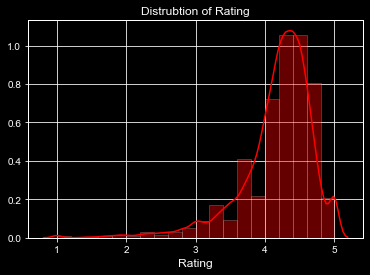

In [90]:
sns.distplot(inp1.Rating, bins =20,vertical =False,color='r')
plt.title('Distrubtion of Rating', fontsize =12)
plt.show()

In [91]:
plt.style.use('default')
%matplotlib inline

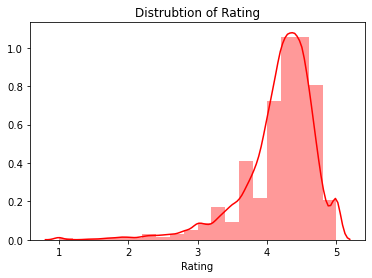

In [92]:
sns.distplot(inp1.Rating, bins =20,vertical =False,color='r')
plt.title('Distrubtion of Rating', fontsize =12)
plt.show()

#### Pie-Chart and Bar Chart

For analysing how a numeric variable changes across several categories of a categorical variable you utilise either a pie chart or a box plot

For example, if you want to visualise the responses of a marketing campaign, you can use the following views:

![PieChart](images\pie.png)

![barChart](images\bar.png)

- You'll be using the pandas method of plotting both a pie chart and a bar chart. Check out their official documentations:
   - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html
   - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.pie.html

In [93]:
#Analyse the Content Rating column
inp1['Content Rating'].value_counts()

Everyone           6898
Teen                918
Mature 17+          417
Everyone 10+        336
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

In [94]:
inp1[inp1['Content Rating'].isin(['Adults only 18+','Unrated'])]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
298,Manga Master - Best manga & comic reader,COMICS,4.6,24005,4900.000000,500000,Free,0.0,Adults only 18+,Comics,"July 4, 2018",1.1.7.0,4.1 and up
3043,DraftKings - Daily Fantasy Sports,SPORTS,4.5,50017,41000.000000,1000000,Free,0.0,Adults only 18+,Sports,"July 24, 2018",3.21.324,4.4 and up
6424,Manga Books,COMICS,3.8,7326,21516.529524,500000,Free,0.0,Adults only 18+,Comics,"August 3, 2018",Varies with device,Varies with device
8266,DC Universe Online Map,TOOLS,4.1,1186,6400.000000,50000,Free,0.0,Unrated,Tools,"February 27, 2012",1.3,2.3.3 and up


In [95]:
inp1 = inp1[~inp1['Content Rating'].isin(['Adults only 18+','Unrated'])]

In [96]:
inp1.shape

(8569, 13)

In [97]:
inp1.reset_index(inplace=True,drop = True)

In [98]:
inp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8569 entries, 0 to 8568
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8569 non-null   object 
 1   Category        8569 non-null   object 
 2   Rating          8569 non-null   float64
 3   Reviews         8569 non-null   int32  
 4   Size            8569 non-null   float64
 5   Installs        8569 non-null   int64  
 6   Type            8569 non-null   object 
 7   Price           8569 non-null   float64
 8   Content Rating  8569 non-null   object 
 9   Genres          8569 non-null   object 
 10  Last Updated    8569 non-null   object 
 11  Current Ver     8569 non-null   object 
 12  Android Ver     8567 non-null   object 
dtypes: float64(3), int32(1), int64(1), object(8)
memory usage: 836.9+ KB


In [99]:
#Remove the rows with values which are less represented 


In [100]:
#Reset the index


In [101]:
#Check the apps belonging to different categories of Content Rating 
inp1['Content Rating'].value_counts()

Everyone        6898
Teen             918
Mature 17+       417
Everyone 10+     336
Name: Content Rating, dtype: int64

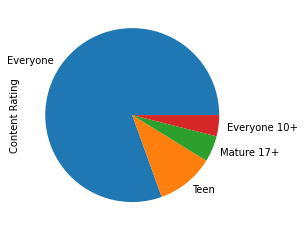

In [102]:
#Plot a pie chart

inp1['Content Rating'].value_counts().plot.pie()

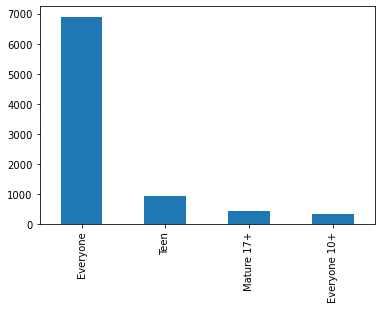

In [103]:
#Plot a bar chart
inp1['Content Rating'].value_counts().plot.bar()
plt.show()

In [104]:
#Question - Plot a bar plot for checking the 4th highest Android version type
inp1


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.000000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.000000,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.000000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.000000,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8564,FR Calculator,FAMILY,4.0,7,2600.000000,500,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
8565,Sya9a Maroc - FR,FAMILY,4.5,38,53000.000000,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
8566,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.000000,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
8567,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.529524,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [105]:
inp1['Android Ver'].value_counts()

4.1 and up            1873
4.0.3 and up          1168
4.0 and up            1062
Varies with device     988
4.4 and up             824
2.3 and up             559
5.0 and up             527
4.2 and up             320
2.3.3 and up           232
2.2 and up             208
3.0 and up             205
4.3 and up             192
2.1 and up             110
1.6 and up              86
6.0 and up              48
7.0 and up              39
3.2 and up              31
2.0 and up              27
5.1 and up              18
1.5 and up              16
3.1 and up               7
4.4W and up              6
2.0.1 and up             6
8.0 and up               5
7.1 and up               2
4.0.3 - 7.1.1            2
1.0 and up               2
5.0 - 8.0                2
5.0 - 6.0                1
7.0 - 7.1.1              1
Name: Android Ver, dtype: int64

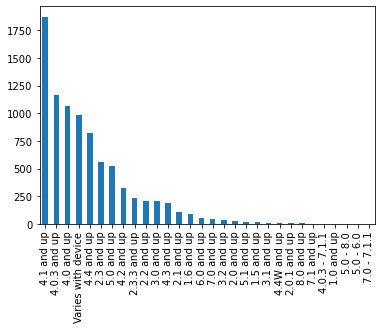

In [106]:
inp1['Android Ver'].value_counts().plot.bar()

#### Scatter Plots

Scatterplots are perhaps one of the most commonly used as well one of the most powerful visualisations you can use in the field of machine learning. They are pretty crucial in revealing relationships between the data points and you can generally deduce some sort of trends in the data with the help of a scatter plot. 

![Scatterplot](images\scatter.png)

- They're pretty useful in regression problems to check whether a linear trend exists in the data or not. For example, in the image below, creating a linear model in the first case makes far more sense since a clear straight line trend is visible.

![Scatterplot-Reg](images\regression3.png)

- Also, they help in observing __naturally occuring clusters__. In the following image, the marks of students in Maths and Biology has been plotted.You can clearly group the students to 4 clusters now. Cluster 1 are students who score very well in Biology but very poorly in Maths, Cluster 2 are students who score equally well in both the subjects and so on.

![Scatter-Clusters](images\Clusters.png)

**Note**: You'll be studying about both Regression and Clustering in greater detail in the machine learning modules

You'll be using **sns.jointplot()** for creating a scatter plot. Check out its documentation:
https://seaborn.pydata.org/generated/seaborn.jointplot.html

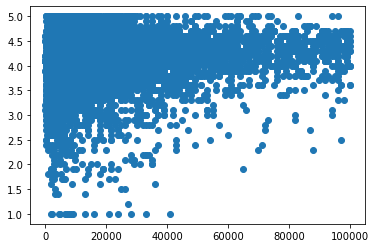

In [107]:
###Size vs Rating

##Plot a scatter-plot in the matplotlib way between Size and Rating
plt.scatter(inp1.Size,inp1.Rating)
plt.show()

In [108]:
sns.set_style('white')

In [109]:
?sns.jointplot()

Object `sns.jointplot()` not found.


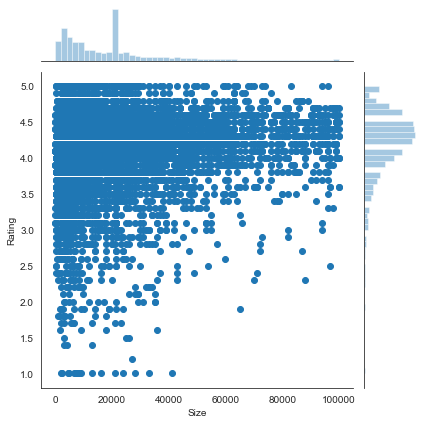

In [110]:


sns.jointplot(inp1.Size,inp1.Rating)
plt.show()

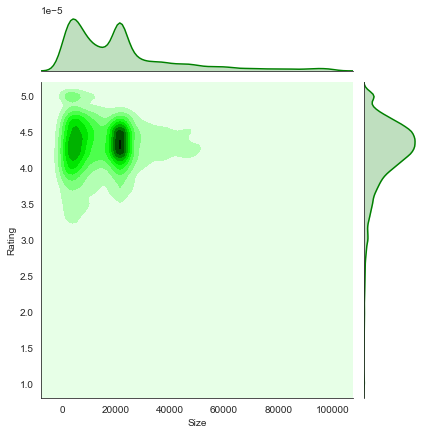

In [111]:
sns.jointplot(inp1.Size, inp1.Rating, kind = 'kde',color = 'G')

In [112]:
### Plot the same thing now using a jointplot


In [113]:
## Plot a jointplot for Price and Rating


**Reg Plots**

- These are an extension to the jointplots, where a regression line is added to the view 

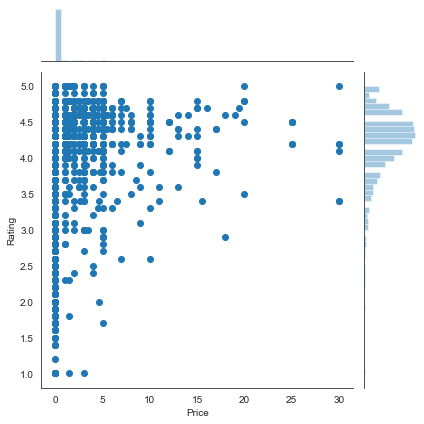

In [114]:
sns.jointplot(inp1.Price,inp1.Rating)
plt.show()

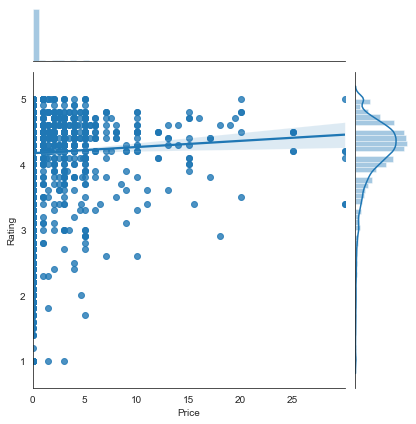

In [115]:
##Plot a reg plot for Price and Rating and observe the trend
sns.jointplot(inp1.Price,inp1.Rating,kind='reg')
plt.show()



In [116]:
## Question - Plot a reg plot for Price and Rating again for only the paid apps.


**Pair Plots**

 - When you have several numeric variables, making multiple scatter plots becomes rather tedious. Therefore, a pair plot visualisation is preferred where all the scatter plots are in a single view in the form of a matrix
 - For the non-diagonal views, it plots a **scatter plot** between 2 numeric variables
 - For the diagonal views, it plots a **histogram**

Pair Plots help in identifying the trends between a target variable and the predictor variables pretty quickly. For example, say you want to predict how your company’s profits are affected by three different factors. In order to choose which you created a pair plot containing profits and the three different factors as the variables. Here are the scatterplots of profits vs the three variables that you obtained from the pair plot.

![Pairplots](images\pairplots2.png)

It is clearly visible that the left-most factor is the most prominently related to the profits, given how linearly scattered the points are and how randomly scattered the rest two factors are.

You'll be using **sns.pairplot()** for this visualisation. Check out its official documentation:https://seaborn.pydata.org/generated/seaborn.pairplot.html

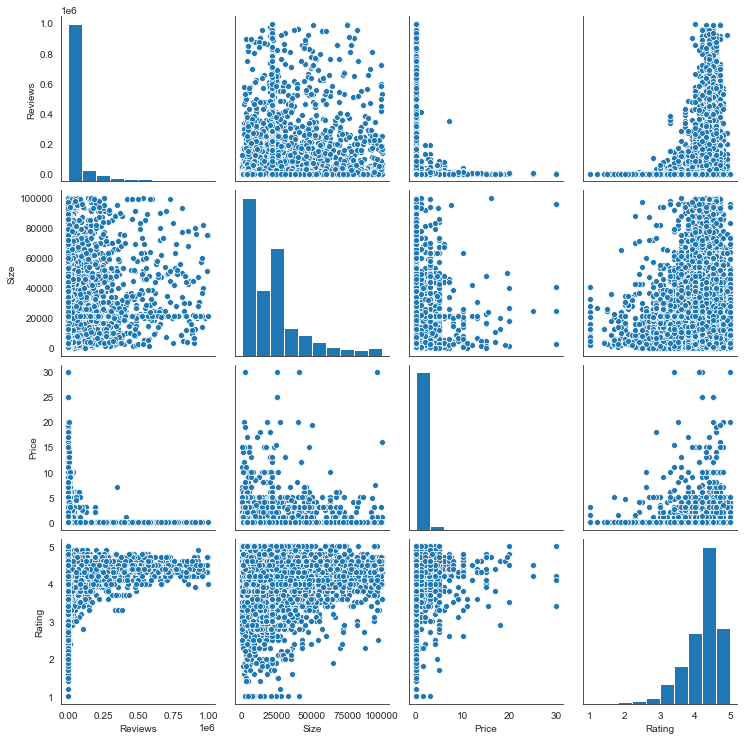

In [117]:
## Create a pair plot for Reviews, Size, Price and Rating
sns.pairplot(inp1[['Reviews','Size','Price','Rating']])
plt.show()



**Bar Charts Revisited**

- Here, you'll be using bar charts once again, this time using the **sns.barplot()** function. Check out its official documentation:https://seaborn.pydata.org/generated/seaborn.barplot.html
- You can modify the **estimator** parameter to change the aggregation value of your barplot

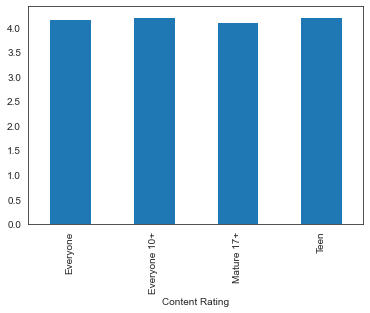

In [118]:
##Plot a bar plot of Content Rating vs Average Rating
inp1.groupby(['Content Rating'])['Rating'].mean().plot.bar()


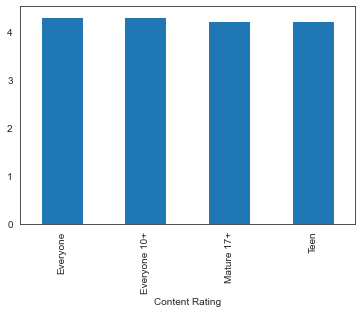

In [119]:
##Plot the bar plot again with Median Rating
inp1.groupby('Content Rating')['Rating'].median().plot.bar()

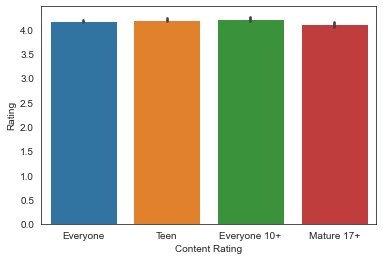

In [120]:
##Plot the above bar plot using the estimator parameter
sns.barplot(data=inp1,x='Content Rating',y='Rating')
plt.show()



### average Medaian in between

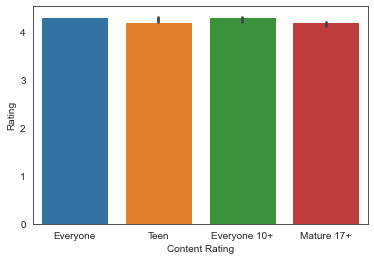

In [121]:
sns.barplot(data=inp1,x='Content Rating',y='Rating',estimator = np.median)
plt.show()


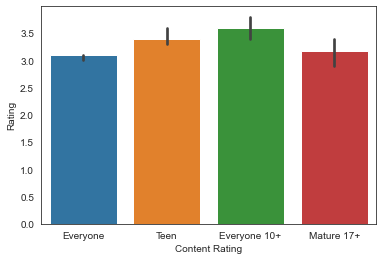

In [122]:
##Plot the bar plot with only the 5th percentile of Ratings
sns.barplot(data = inp1,x='Content Rating',y = 'Rating',estimator = lambda x:np.quantile(x,0.05))
plt.show()

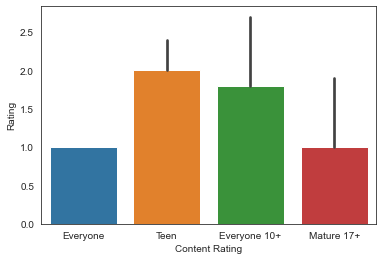

In [123]:
##Question - Plot the bar plot with the minimum Rating
sns.barplot(data = inp1,x = 'Content Rating',y = 'Rating',estimator = np.min)
plt.show()


__Box Plots Revisited__

- Apart from outlier analysis, box plots are great at comparing the spread and analysing a numerical variable across several categories
- Here you'll be using **sns.boxplot()** function to plot the visualisation. Check out its documentation: https://seaborn.pydata.org/generated/seaborn.boxplot.html




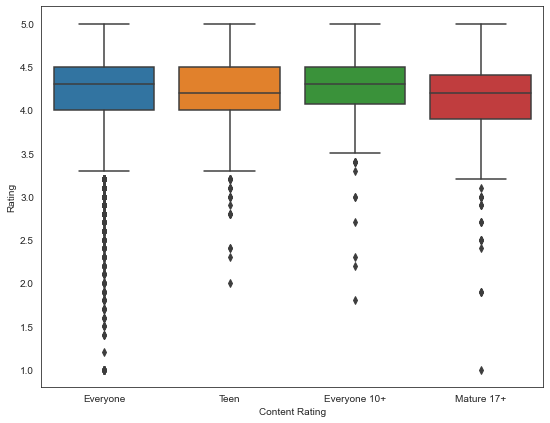

In [124]:
##Plot a box plot of Rating vs Content Rating
plt.figure(figsize = (9,7))
sns.boxplot(inp1['Content Rating'],inp1.Rating)
plt.show()

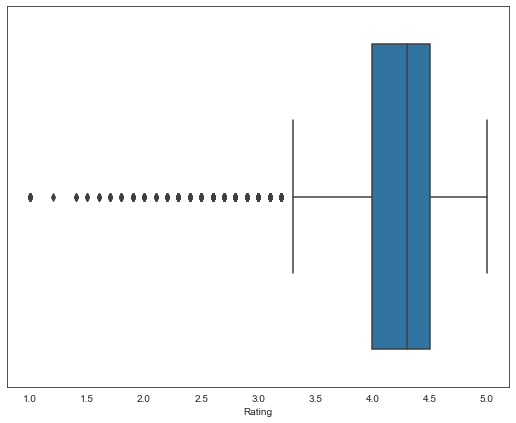

In [125]:
##Question - Plot a box plot for the Rating column only
plt.figure(figsize = (9,7))
sns.boxplot(inp1.Rating)
plt.show()


In [126]:
inp1


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.000000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.000000,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.000000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.000000,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8564,FR Calculator,FAMILY,4.0,7,2600.000000,500,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
8565,Sya9a Maroc - FR,FAMILY,4.5,38,53000.000000,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
8566,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.000000,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
8567,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.529524,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [127]:
inp1['Genres'].value_counts()

Tools                          686
Entertainment                  505
Education                      464
Medical                        344
Finance                        311
                              ... 
Communication;Creativity         1
Entertainment;Education          1
Music & Audio;Music & Video      1
Parenting;Brain Games            1
Strategy;Creativity              1
Name: Genres, Length: 115, dtype: int64

In [128]:
inp2 = inp1.groupby(inp1['Genres'].value_counts()[0:5])
inp2.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [129]:
print(inp2.gruopby('Genres'))

AttributeError: 'DataFrameGroupBy' object has no attribute 'gruopby'

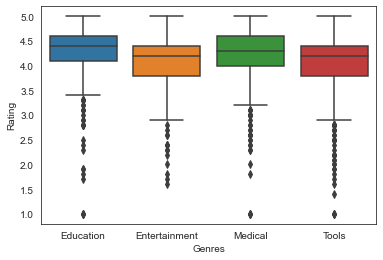

In [130]:
##Question - Plot a box plot of Ratings across the 4 most popular Genres
inp1['Genres'].value_counts()
c = ['Tools','Entertainment','Medical','Education']
inp5= inp1[inp1['Genres'].isin(c)]
sns.boxplot(inp5['Genres'],inp1.Rating)

#### Heat Maps

Heat mapsutilise the concept of using colours and colour intensities to visualise a range of values. You must have seen heat maps in cricket or football broadcasts on television to denote the players’ areas of strength and weakness.

![HeatMap](images\heatmap1.png)

- In python, you can create a heat map whenever you have a rectangular grid or table of numbers analysing any two features

![heatmap2](images\heatmap2.png)

- You'll be using **sns.heatmap()** to plot the visualisation. Checkout its official documentation :https://seaborn.pydata.org/generated/seaborn.heatmap.html

In [131]:
?pd.qcut

In [132]:
##Ratings vs Size vs Content Rating
inp1["Size_Bucket"]=pd.qcut(inp1.Size,[0,0.2,0.4,0.6,0.8,1],["VL","L","M","H","VH"])

##Prepare buckets for the Size column using pd.qcut
inp1


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_Bucket
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.000000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,M
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,M
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.000000,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,L
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.000000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,H
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.000000,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,VL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8564,FR Calculator,FAMILY,4.0,7,2600.000000,500,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up,VL
8565,Sya9a Maroc - FR,FAMILY,4.5,38,53000.000000,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,VH
8566,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.000000,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,VL
8567,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.529524,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,M


In [133]:
##Create a pivot table for Size_buckets and Content Rating with values set to Rating
pd.pivot_table(data = inp1, index = 'Content Rating', columns = 'Size_Bucket', values = 'Rating')


Size_Bucket,VL,L,M,H,VH
Content Rating,,,,,
Everyone,4.116677,4.158290,4.215450,4.170994,4.187102
Everyone 10+,4.188889,4.207143,4.238318,4.193443,4.216393
Mature 17+,3.951429,4.129592,4.021705,4.155172,4.193814
Teen,4.220213,4.208511,4.141637,4.198131,4.246102


In [134]:
##Change the aggregation to median
pd.pivot_table(data = inp1, index = 'Content Rating', columns = 'Size_Bucket', values = 'Rating',aggfunc = np.median)


Size_Bucket,VL,L,M,H,VH
Content Rating,,,,,
Everyone,4.2,4.3,4.3,4.3,4.3
Everyone 10+,4.1,4.3,4.3,4.3,4.3
Mature 17+,4.2,4.2,4.1,4.1,4.2
Teen,4.3,4.3,4.2,4.2,4.3


In [135]:
##Change the aggregation to 20th percentile
pd.pivot_table(data = inp1, index = 'Content Rating', columns = 'Size_Bucket', values = 'Rating', aggfunc =lambda x:np.quantile(x,0.2))


Size_Bucket,VL,L,M,H,VH
Content Rating,,,,,
Everyone,3.80,3.80,4.0,3.8,3.9
Everyone 10+,3.84,3.94,4.1,4.0,4.0
Mature 17+,3.28,3.64,3.7,3.9,4.0
Teen,3.86,3.80,3.9,4.0,4.0


In [136]:
##Store the pivot table in a separate variable
res = pd.pivot_table(data = inp1, index = 'Content Rating', columns = 'Size_Bucket', values = 'Rating', aggfunc =lambda x:np.quantile(x,0.2))

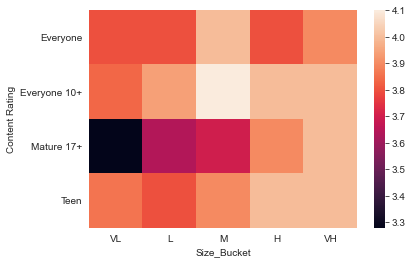

In [137]:
##Plot a heat map
sns.heatmap(res)
plt.show()


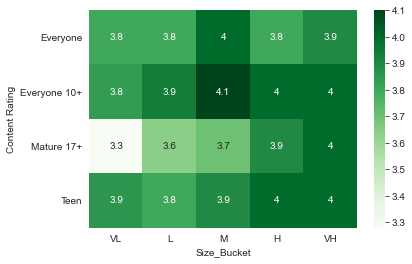

In [138]:
##Apply customisations
sns.heatmap(res,cmap = 'Greens', annot = True)
plt.show()


In [139]:
##Question - Replace Content Rating with Review_buckets in the above heat map
##Keep the aggregation at minimum value for Rating


### Session 3: Additional Visualisations

#### Line Plots

- A line plot tries to observe trends using time dependent data.
-  For this part, you'll be using **pd.to_datetime()** function. Check out its documentation:https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html


In [140]:
## Extract the month from the Last Updated Date
inp1['Last Updated'].head()


0     January 7, 2018
1    January 15, 2018
2      August 1, 2018
3        June 8, 2018
4       June 20, 2018
Name: Last Updated, dtype: object

In [141]:
pd.to_datetime(inp1['Last Updated']).dt.month

0       1
1       1
2       8
3       6
4       6
       ..
8564    6
8565    7
8566    7
8567    1
8568    7
Name: Last Updated, Length: 8569, dtype: int64

In [143]:
inp1['updated_month'] = pd.to_datetime(inp1['Last Updated']).dt.month
inp1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_Bucket,updated_month
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.000000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,M,1
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,M,1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.000000,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,L,8
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.000000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,H,6
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.000000,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,VL,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8564,FR Calculator,FAMILY,4.0,7,2600.000000,500,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up,VL,6
8565,Sya9a Maroc - FR,FAMILY,4.5,38,53000.000000,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,VH,7
8566,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.000000,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,VL,7
8567,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.529524,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,M,1


In [153]:
## Find the average Rating across all the months
inp1.groupby(inp1['updated_month'])['Rating'].mean()


updated_month
1     4.145050
2     4.090385
3     4.107963
4     4.148326
5     4.153894
6     4.172865
7     4.222399
8     4.270607
9     4.041406
10    4.012739
11    4.102020
12    4.064939
Name: Rating, dtype: float64

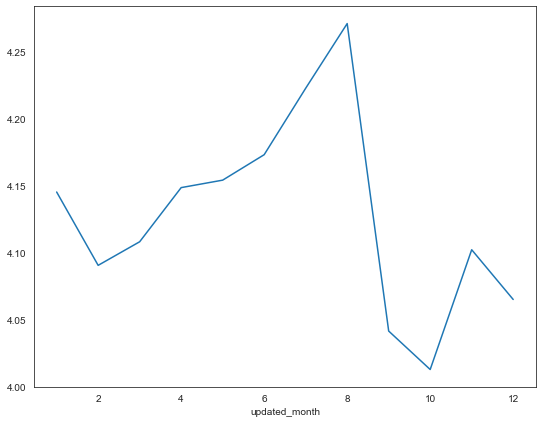

In [154]:
## Plot a line graph
plt.figure(figsize = (9,7))
inp1.groupby(inp1['updated_month'])['Rating'].mean().plot()
plt.show()


#### Stacked Bar Charts

- A stacked bar chart breaks down each bar of the bar chart on the basis of a different category
- For example, for the Campaign Response bar chart you saw earlier, the stacked bar chart is also showing the Gender bifurcation as well

![Stacked](images\stacked.png)

In [156]:
## Create a pivot table for Content Rating and updated Month with the values set to Installs
monthly = pd.pivot_table(data = inp1,values = 'Installs', index='updated_month', columns='Content Rating',aggfunc= sum)
monthly

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
updated_month,,,,
1,725387390,105282000,9701210,44159010
2,545372005,19821000,13021500,39597710
3,695365520,30322510,9111100,79850310
4,973371180,23300000,5259000,161619410
5,1461067800,118173500,50140100,202689600
6,2127170505,217727100,145257200,415716600
7,6371109680,456556000,419491910,1143556800
8,4430943320,215821000,312981700,1057855650
9,260340410,24931100,2201010,22483100


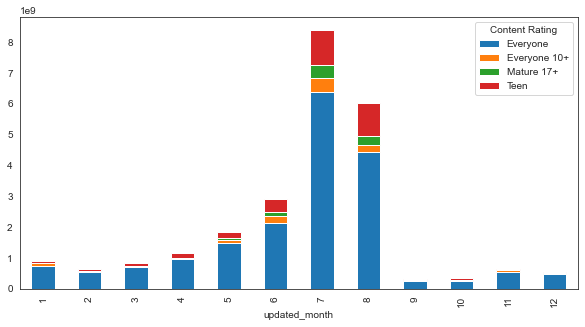

In [159]:
##Store the table in a separate variable
monthly.plot(kind='bar',stacked="True",figsize=[10,5])
plt.show()

In [163]:
##Plot the stacked bar chart.
monthly_prop = monthly[['Everyone','Everyone 10+','Mature 17+','Teen']].apply(lambda x: x/x.sum(),axis =1)
monthly_prop

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
updated_month,,,,
1,0.820083,0.119026,0.010968,0.049924
2,0.882747,0.032083,0.021077,0.064093
3,0.853576,0.037222,0.011184,0.098018
4,0.836553,0.020025,0.004520,0.138902
5,0.797495,0.064503,0.027368,0.110634
6,0.732025,0.074927,0.049987,0.143061
7,0.759305,0.054412,0.049995,0.136288
8,0.736330,0.035865,0.052011,0.175794
9,0.839928,0.080434,0.007101,0.072537


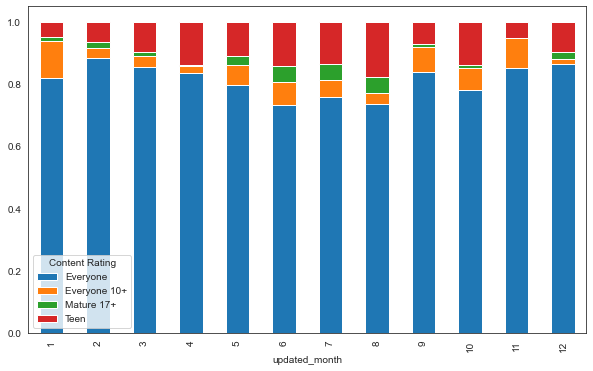

In [164]:
##Plot the stacked bar chart again wrt to the proportions.
monthly_prop.plot(kind = 'bar', stacked = "True", figsize=[10,6])
plt.show()

#### Plotly

Plotly is a Python library used for creating interactive visual charts. You can take a look at how you can use it to create aesthetic looking plots with a lot of user-friendly functionalities like hover, zoom, etc.

Check out this link for installation and documentation:https://plot.ly/python/getting-started/

In [ ]:
#Install plotly


In [ ]:
#Take the table you want to plot in a separate variable


In [ ]:
#Import the plotly libraries


In [ ]:
#Prepare the plot
